In [1]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy


In [2]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test1 = x_test
y_test1 = y_test


x_train = x_train.reshape(60000, 784).astype("float32")/255
x_test = x_test.reshape(10000, 784).astype("float32")/255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]



In [4]:
model.compile(
    optimizer = keras.optimizers.RMSprop(0.001),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()],
)

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=5e-3,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=5,
        verbose=1,
    )
]

In [6]:
history = model.fit(
    x_train, y_train, batch_size = 128, epochs = 20, validation_split=(0.13), callbacks = callbacks, validation_data = (x_val, y_val),
)
%tensorboard --logdir logs/fit

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6621 - sparse_categorical_accuracy: 0.8139 - val_loss: 0.2108 - val_sparse_categorical_accuracy: 0.9404
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2043 - sparse_categorical_accuracy: 0.9398 - val_loss: 0.1650 - val_sparse_categorical_accuracy: 0.9520
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1513 - sparse_categorical_accuracy: 0.9551 - val_loss: 0.1246 - val_sparse_categorical_accuracy: 0.9648
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1133 - sparse_categorical_accuracy: 0.9660 - val_loss: 0.1109 - val_sparse_categorical_accuracy: 0.9683
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0936 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.1031 - val_sparse_categorical_accuracy: 0.9695
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0797 - sparse_categorical_accuracy: 0.9764 - val_loss: 0.1105 - val_sparse_categorical_accuracy: 0.9684
Epoc

UsageError: Line magic function `%tensorboard` not found.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


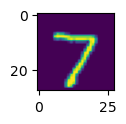

Real Value:  7.0
Model Prediction:  7


<Figure size 640x480 with 0 Axes>

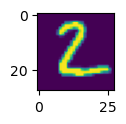

Real Value:  2.0
Model Prediction:  2


<Figure size 640x480 with 0 Axes>

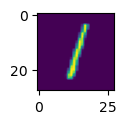

Real Value:  1.0
Model Prediction:  1


<Figure size 640x480 with 0 Axes>

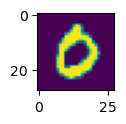

Real Value:  0.0
Model Prediction:  0


<Figure size 640x480 with 0 Axes>

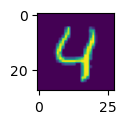

Real Value:  4.0
Model Prediction:  4


<Figure size 640x480 with 0 Axes>

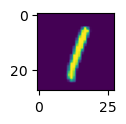

Real Value:  1.0
Model Prediction:  1


<Figure size 640x480 with 0 Axes>

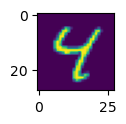

Real Value:  4.0
Model Prediction:  4


<Figure size 640x480 with 0 Axes>

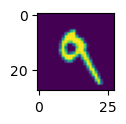

Real Value:  9.0
Model Prediction:  9


<Figure size 640x480 with 0 Axes>

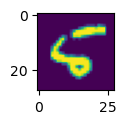

Real Value:  5.0
Model Prediction:  6


<Figure size 640x480 with 0 Axes>

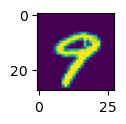

Real Value:  9.0
Model Prediction:  9


<Figure size 640x480 with 0 Axes>

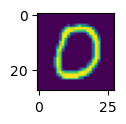

Real Value:  0.0
Model Prediction:  0


<Figure size 640x480 with 0 Axes>

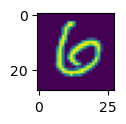

Real Value:  6.0
Model Prediction:  6


<Figure size 640x480 with 0 Axes>

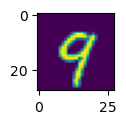

Real Value:  9.0
Model Prediction:  9


<Figure size 640x480 with 0 Axes>

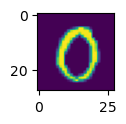

Real Value:  0.0
Model Prediction:  0


<Figure size 640x480 with 0 Axes>

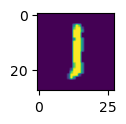

Real Value:  1.0
Model Prediction:  1


<Figure size 640x480 with 0 Axes>

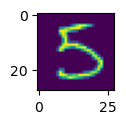

Real Value:  5.0
Model Prediction:  5


<Figure size 640x480 with 0 Axes>

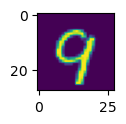

Real Value:  9.0
Model Prediction:  9


<Figure size 640x480 with 0 Axes>

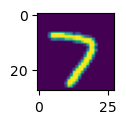

Real Value:  7.0
Model Prediction:  7


<Figure size 640x480 with 0 Axes>

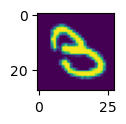

Real Value:  3.0
Model Prediction:  3


<Figure size 640x480 with 0 Axes>

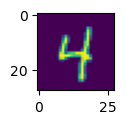

Real Value:  4.0
Model Prediction:  4
(20, 10)


<Figure size 640x480 with 0 Axes>

In [18]:
numTest = 20
predictions = model.predict(x_test[:numTest])

for i in range(0, numTest):
    maxVal = 0
    maxIndex = -1
    first_array=x_test1[i]
    #Not sure you even have to do that if you just want to visualize it
    #first_array=255*first_array
    #first_array=first_array.astype("uint8")
    print("===============================================")
    plt.figure(figsize = (1,1))
    plt.imshow(first_array)
    #Actually displaying the plot if you are not in interactive mode
    plt.show()
    #Saving plot
    plt.savefig("fig.png", dpi=100)
    print("Real Value: ", y_test[i])
    for j in range(0, 10):
        if maxVal < predictions[i][j]:
            maxVal = predictions[i][j]
            maxIndex = j
    print("Model Prediction: ", maxIndex)
    

print(predictions.shape)

In [53]:
#train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
#train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)
#model.fit(train_dataset, epochs=9, steps_per_epoch=100) #there seems to be a maximum of 938 data points in this dataset

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8360e-07 - sparse_categorical_accuracy: 1.0000
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0095e-06 - sparse_categorical_accuracy: 1.0000
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9331e-07 - sparse_categorical_accuracy: 1.0000
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9637e-07 - sparse_categorical_accuracy: 1.0000
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9649e-07 - sparse_categorical_accuracy: 1.0000
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9915e-07 - sparse_categorical_accuracy: 1.0000
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7097e-07 - sparse_categorical_accuracy: 1.0000
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2967e-07 - sparse_categorical_accuracy: 1.0000
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1730e-07 - sparse_categorical_accuracy: 1.0000
Epoch 10/10
100/100